# 의사 결정 나무

여러 가지 규칙을 순차적으로 적용하면서 독립 변수 공간을 분할하는 분류 모형이다. 

분류(classification)와 회귀 분석(regression)에 모두 사용될 수 있다.

1. 여러가지 독립 변수 중 하나의 독립 변수를 선택하고 그 독립 변수에 대한 기준값(threshold)을 정한다. 이를 분류 규칙이라고 한다. 최적의 분류 규칙을 찾는 방법은 이후에 자세히 설명한다.
1. 전체 학습 데이터 집합(부모 노드)을 해당 독립 변수의 값이 기준값보다 큰 데이터 그룹(자식 노드 1)과 해당 독립 변수의 값이 기준값보다 작은 데이터 그룹(자식 노드 2)으로 나눈다.
1. 자식 노드에 있는 데이터의 클래스의 비율을 조사하여 가장 데이터 수가 많은 클래스를 그 자식 노드의 대표 클래스로 정한다.
1. 각각의 자식 노드에 대해 1~3의 단계를 반복하여 하위의 자식 노드를 만든다. 단, 자식 노드에 한가지 클래스의 데이터만 존재한다면 더 이상 자식 노드를 나누지 않고 중지한다.

이렇게 자식 노드 나누기를 연속적으로 적용하면 노드가 계속 증가하는 나무(tree)와 같은 형태로 표현할 수 있다.

# Information Gain
IG는 데이터 분리에 의해 확률 변수의 엔트로피가 얼마나 감소하였는가를 나타냄
- 더 많이 감소할수록 더 많은 정보를 갖고 있음

$$IG[Y,X] = H[Y] - H[Y|X]$$

## Scikit-Learn

데이터

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

시각화 코드

In [2]:
%matplotlib inline
import io
import pydot
from IPython.core.display import Image 
from sklearn.tree import export_graphviz

def draw_decision_tree(model):
    dot_buf = io.StringIO() 
    export_graphviz(model, out_file=dot_buf, feature_names=iris.feature_names[2:])
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], s=80, label=cl)

    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    
    return Z

In [3]:
tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1).fit(X, y)

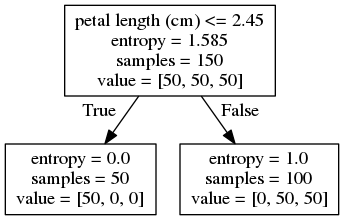

In [4]:
draw_decision_tree(tree1)

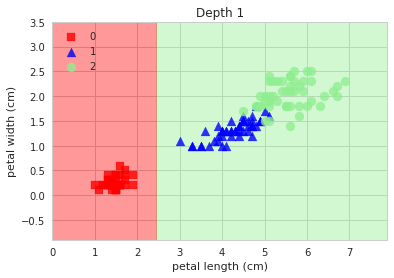

In [5]:
plot_decision_regions(X, y, tree1, "Depth 1")
plt.show()

In [6]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, tree1.predict(X))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0, 50,  0]])

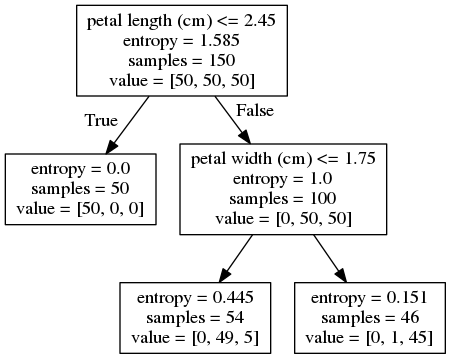

In [7]:
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=2).fit(X, y)
draw_decision_tree(tree2)

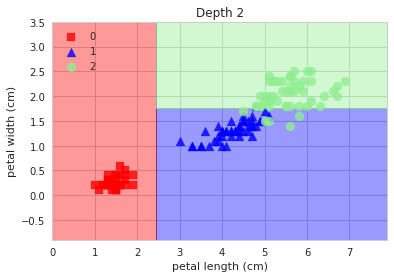

In [8]:
plot_decision_regions(X, y, tree2, "Depth 2")
plt.show()

## 연습
1. 붓꽃 분류 문제에서 꽃잎의 길이와 폭을 사용하여 위와 같이 의사 결정 나무 모형을 만들고 accuracy 성능을 측정한다.
1. K=5 인 교차 검증을 통해 평균 accuracy 성능을 측정한다.
1. max_depth 인수를 바꾸어 가면서 가장 평균 accuracy 성능이 좋은 max_depth 인수를 찾아라.

In [9]:
iris = load_iris()
X = iris.data[:, [0, 1]]
y = iris.target

In [10]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [11]:
from sklearn.model_selection import *
cv = KFold(5)

for i in range(1,10):
    tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=i).fit(X, y)
    print("{}".format(i), cross_val_score(tree1, X, y, scoring="accuracy", cv=cv).mean())

1 0.35333333333333333
2 0.4133333333333334
3 0.5733333333333335
4 0.56
5 0.62
6 0.5933333333333334
7 0.5866666666666667
8 0.56
9 0.5466666666666666


#### depth가 5일때 가장 평균 성능이 좋다.

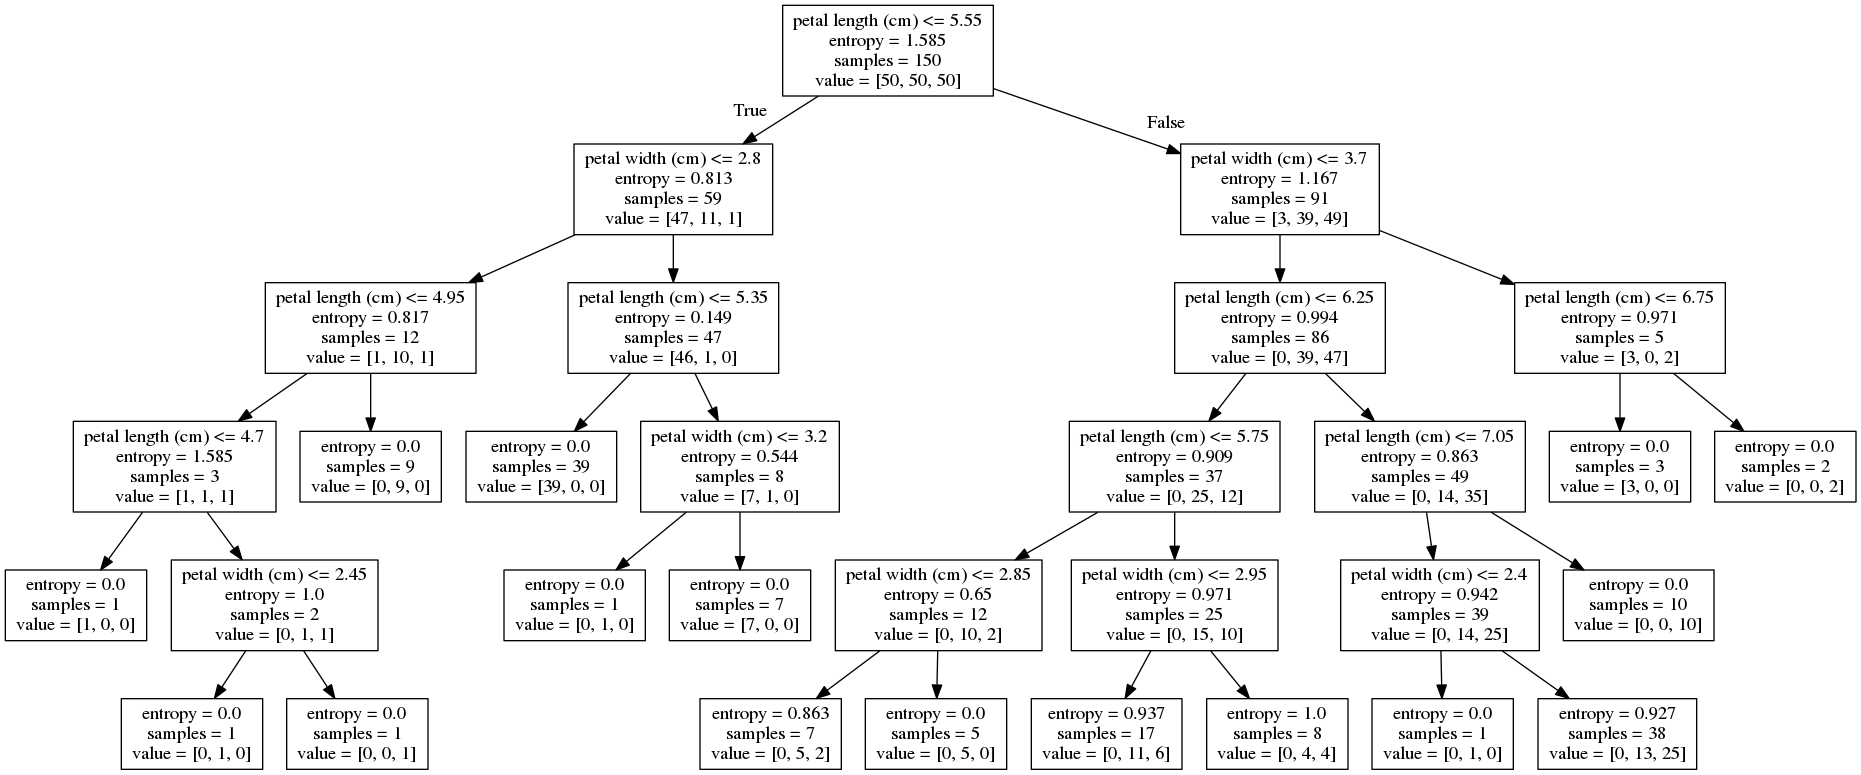

In [12]:
tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=5).fit(X, y)
draw_decision_tree(tree1)

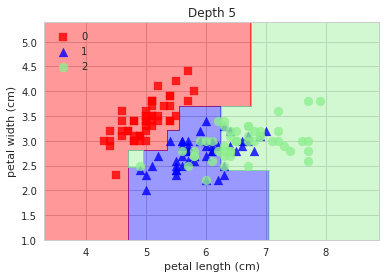

In [13]:
plot_decision_regions(X, y, tree1, "Depth 5")
plt.show()